In [1]:
import pandas as pd 

In [2]:
pwd


'c:\\Users\\gameg\\OneDrive\\Desktop\\task2'

In [4]:
import json

#Our Dataset in JSON file path
json_file_path = "C:\\Users\\gameg\\OneDrive\\Desktop\\data mining\\project_proposal\\New folder (2)\\orignal_data.json"


#List to store JSON objects
json_objects = []

#Reading the JSON file
with open(json_file_path, 'r') as file:

    #Reading each line in the file
    for line_number, line in enumerate(file, start=1):
        try:
            #Attempting to load the JSON object from the line
            json_obj = json.loads(line)
            json_objects.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON at line {line_number}: {e}")
            print("Problematic line:", line.strip())

#Now here you see json_objects contains all valid JSON objects from the file





In [5]:
import csv

#Our Dataset Path to the CSV file
csv_file_path = "C:\\Users\\gameg\\OneDrive\\Desktop\\data mining\\project_proposal\\New folder (2)\\clean set.csv"

# List of field names/column names
field_names = ["fit", "user_id", "bust size", "item_id", "weight", "rating", "rented for",
               "review_text", "body type", "review_summary", "category", "height", "size", "age", "review_date"]

# Write the JSON data to CSV
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=field_names)

    # Write header
    csv_writer.writeheader()

    # Write data
    csv_writer.writerows(json_objects)


.

.

.

###  Data Preprocessing 

/////////////////////

In [9]:
data  = pd.read_csv("C:\\Users\\gameg\\OneDrive\\Desktop\\data mining\\project_proposal\\New folder (2)\\clean set.csv")

In [10]:
data.head(10)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
5,fit,734848,32b,364092,138lbs,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016"
6,fit,336066,34c,568429,112lbs,10.0,everyday,This dress is so sweet. I loved the print. The...,hourglass,LITERALLY THE CUTEST DRESS EVER,dress,"5' 3""",4,27.0,"December 7, 2017"
7,fit,86661,34d+,130259,118lbs,10.0,formal affair,Fit was great. Maybe a little tight under the ...,full bust,"Great dress, beautifully made. I received lot...",dress,"5' 3""",8,65.0,"January 1, 2013"
8,fit,166228,36d,1729232,NaN,10.0,formal affair,I was nervous of it looking cheap when it arri...,full bust,Great for black tie event!,gown,"5' 6""",21,27.0,"June 27, 2016"
9,fit,154309,32b,1729232,114lbs,10.0,formal affair,The dress was very flattering and fit perfectl...,petite,This dress was everything! It was perfect for ...,gown,"5' 3""",1,33.0,"October 17, 2016"


In [11]:
data.isnull().sum()


fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text          68
body type         14637
review_summary      347
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

checking the number of item used and is it repeated then give me the count of that items 

In [12]:
df = data 
item_counts = df['item_id'].value_counts()
result_df = pd.DataFrame({
    'Item': item_counts.index,
    'Count': item_counts.values
})

print("Total number of items:", len(result_df))
print("\nCounting of each item:")
result_df.head(200)

Total number of items: 5850

Counting of each item:


,Item,Count
0,126335,2241
1,174086,1724
2,123793,1714
3,132738,1582
4,145906,1478
...,...,...
195,451969,145
196,417055,144
197,263699,144
198,903647,143


In [13]:
import pandas as pd

data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
null_rating_rows = data[data['rating'].isnull()]
item_ids_with_null_rating = null_rating_rows['item_id'].unique()
print("Item IDs with null values in rating:", item_ids_with_null_rating)


Item IDs with null values in rating: [181453 126335 146684 149739 187164 154002 145906 124204 142179 125564
 139086 134849 183200 140321 160612 147594 132738 147020 144714 143094
 130259 159395 195124 200269 164593 159931]


In [14]:
import pandas as pd

data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

#Below is Item IDs with null values in 'rating'
item_ids_with_null = [181453, 126335, 146684, 149739, 187164, 154002, 145906, 124204, 142179, 125564,
                      139086, 134849, 183200, 140321, 160612, 147594, 132738, 147020, 144714, 143094,
                      130259, 159395, 195124, 200269, 164593, 159931]

# Calculate the median rating for each specified 'item_id'
median_ratings_by_item = data[data['item_id'].isin(item_ids_with_null)].groupby('item_id')['rating'].median().reset_index()

# Replace null values in 'rating' with the corresponding median for each 'item_id'
for index, row in median_ratings_by_item.iterrows():
    item_id = row['item_id']
    median_rating = row['rating']
    data.loc[(data['item_id'] == item_id) & (data['rating'].isnull()), 'rating'] = median_rating


print("Null values replaced with item-wise median:")
data

Null values replaced with item-wise median:


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [15]:
data.isnull().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating                0
rented for           10
review_text          68
body type         14637
review_summary      347
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [16]:
import pandas as pd

# Drop rows with null values in the "rented for" column
data.dropna(subset=['rented for'], inplace=True)

# Print the modified DataFrame
print("DataFrame after removing rows with null values in 'rented for':")
print(data)


DataFrame after removing rows with null values in 'rented for':
        fit  user_id bust size  item_id  weight  rating     rented for  \
0       fit   420272       34d  2260466  137lbs    10.0       vacation   
1       fit   273551       34b   153475  132lbs    10.0          other   
2       fit   360448       NaN  1063761     NaN    10.0          party   
3       fit   909926       34c   126335  135lbs     8.0  formal affair   
4       fit   151944       34b   616682  145lbs    10.0        wedding   
...     ...      ...       ...      ...     ...     ...            ...   
192539  fit    66386      34dd  2252812  140lbs    10.0           work   
192540  fit   118398       32c   682043  100lbs    10.0           work   
192541  fit    47002       36a   683251  135lbs     6.0       everyday   
192542  fit   961120       36c   126335  165lbs    10.0        wedding   
192543  fit   123612       36b   127865  155lbs    10.0        wedding   

                                              r

In [17]:
data.isnull().sum()

fit                   0
user_id               0
bust size         18408
item_id               0
weight            29982
rating                0
rented for            0
review_text          66
body type         14637
review_summary      337
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

droping the bust size 

In [18]:
data.drop("bust size", axis=1, inplace=True)

In [19]:
data

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


droping weight

In [20]:
data.drop("weight", axis=1, inplace=True)

In [21]:
data

,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,2260466,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,153475,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,1063761,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,126335,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,616682,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,682043,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,683251,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,126335,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [22]:
data.isnull().sum()

fit                   0
user_id               0
item_id               0
rating                0
rented for            0
review_text          66
body type         14637
review_summary      337
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [23]:
item_column = 'item_id'

# Get the count of each unique item ID
item_counts = df[item_column].value_counts()

# Iterate through unique item IDs and print the count
for item_id, count in item_counts.items():
    print(f"Item ID: {item_id}, Count: {count}")

Item ID: 126335, Count: 2241
Item ID: 174086, Count: 1724
Item ID: 123793, Count: 1714
Item ID: 132738, Count: 1582
Item ID: 145906, Count: 1478
Item ID: 127865, Count: 1393
Item ID: 136110, Count: 1197
Item ID: 137585, Count: 1100
Item ID: 131533, Count: 1091
Item ID: 172027, Count: 984
Item ID: 131117, Count: 981
Item ID: 130259, Count: 914
Item ID: 125465, Count: 883
Item ID: 166633, Count: 804
Item ID: 124204, Count: 801
Item ID: 152836, Count: 794
Item ID: 136860, Count: 708
Item ID: 123373, Count: 686
Item ID: 154002, Count: 626
Item ID: 125564, Count: 612
Item ID: 1226293, Count: 579
Item ID: 1076484, Count: 555
Item ID: 168610, Count: 532
Item ID: 168592, Count: 529
Item ID: 139086, Count: 524
Item ID: 153475, Count: 519
Item ID: 128959, Count: 516
Item ID: 144051, Count: 500
Item ID: 146684, Count: 498
Item ID: 124553, Count: 493
Item ID: 138431, Count: 488
Item ID: 152662, Count: 485
Item ID: 147594, Count: 482
Item ID: 125424, Count: 466
Item ID: 127495, Count: 460
Item ID: 

In [24]:
data

,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,2260466,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,153475,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,1063761,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,126335,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,616682,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,682043,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,683251,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,126335,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


## age cleaning 

In [25]:
import pandas as pd

# Identify rows with null values in the "age" column
null_age_rows = data[data['age'].isnull()]

# Print the item IDs for rows with null values in "age"
print("Item IDs with null values in 'age':")
print(null_age_rows['item_id'].unique())


Item IDs with null values in 'age':
[ 132738 1238932  183194  862446 1714731 1869763 2476239  127865  123373
  218606  987569 1362593 1592912 2778191  450618  131533 1674335 1730182
 1237090 2636291  588349 1135348 2175805 2047325 1121730 2770385 2903209
 1498329  160612 1626903  182578 1432370 2452616 1131772 1006362 1692989
 1744232  823534 1031440  451300 1595305 1414597 1309537 1164872  174086
  507732  768842 1499974  992520 1028680 1962198 1257812  137585 2908293
 2269659  670722  929570 1479136 1313942  125564 1054480 2509573  442500
 1522959 1691700  152662 1378631 1383415  329769  595048  456514 1486261
  916639 2675545 2082667 2641483 2038622  716777  397183 1842684  130259
  943243 1795313  142179  131698  342311 2098200 2872079 2673990  166006
  599709 1146287 1175903  372214 2163773  936038 1128722  747241  369599
  536347 1328898 1532367 1605589 1123982  224876 1350479  710834 1281064
 1840180  145906  290624 2036336 1697200  283584 2826127  956997  597613
 2465813  65577

In [26]:
import pandas as pd
data  = pd.read_csv("C:\\Users\\gameg\\OneDrive\\Desktop\\data mining\\project_proposal\\New folder (2)\\clean set.csv")

# Identify rows with null values in the "age" column
null_age_rows = data[data['age'].isnull()]

# Calculate the mean age for each unique "item_id"
mean_age_by_item = data.groupby('item_id')['age'].mean()

# Replace null values in the "age" column with the corresponding mean age
data['age'].fillna(data['item_id'].map(mean_age_by_item), inplace=True)


print("Null values replaced with item-wise mean for age:")
print(data)


Null values replaced with item-wise mean for age:
        fit  user_id bust size  item_id  weight  rating     rented for  \
0       fit   420272       34d  2260466  137lbs    10.0       vacation   
1       fit   273551       34b   153475  132lbs    10.0          other   
2       fit   360448       NaN  1063761     NaN    10.0          party   
3       fit   909926       34c   126335  135lbs     8.0  formal affair   
4       fit   151944       34b   616682  145lbs    10.0        wedding   
...     ...      ...       ...      ...     ...     ...            ...   
192539  fit    66386      34dd  2252812  140lbs    10.0           work   
192540  fit   118398       32c   682043  100lbs    10.0           work   
192541  fit    47002       36a   683251  135lbs     6.0       everyday   
192542  fit   961120       36c   126335  165lbs    10.0        wedding   
192543  fit   123612       36b   127865  155lbs    10.0        wedding   

                                              review_text    

In [27]:
data.isnull().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text          68
body type         14637
review_summary      347
category              0
height              677
size                  0
age                   4
review_date           0
dtype: int64

In [28]:
import pandas as pd

# Assuming your dataframe is named df

# Step 1: Check for null values
null_values = df[df.isnull().any(axis=1)]

# Step 2: Get the item_id of rows with null values
item_ids_with_nulls = null_values['item_id'].unique()

# Step 3: Calculate the mean age for each item_id and replace null values
for item_id in item_ids_with_nulls:
    mean_age = df[df['item_id'] == item_id]['age'].mean()
    df.loc[(df['item_id'] == item_id) & (df['age'].isnull()), 'age'] = mean_age

# Check if all null values are filled
null_values_after_fill = df[df.isnull().any(axis=1)]

print(df)


        fit  user_id  item_id  rating     rented for  \
0       fit   420272  2260466    10.0       vacation   
1       fit   273551   153475    10.0          other   
2       fit   360448  1063761    10.0          party   
3       fit   909926   126335     8.0  formal affair   
4       fit   151944   616682    10.0        wedding   
...     ...      ...      ...     ...            ...   
192539  fit    66386  2252812    10.0           work   
192540  fit   118398   682043    10.0           work   
192541  fit    47002   683251     6.0       everyday   
192542  fit   961120   126335    10.0        wedding   
192543  fit   123612   127865    10.0        wedding   

                                              review_text          body type  \
0       An adorable romper! Belt and zipper were a lit...          hourglass   
1       I rented this dress for a photo shoot. The the...  straight & narrow   
2       This hugged in all the right places! It was a ...                NaN   
3      

In [29]:
df.isnull().sum()

fit                   0
user_id               0
item_id               0
rating                0
rented for            0
review_text          66
body type         14637
review_summary      337
category              0
height              677
size                  0
age                   4
review_date           0
dtype: int64

In [30]:


# Find rows with null values in 'age'
null_age_rows = df[df['age'].isnull()]

# Get item IDs with null values in 'age'
item_ids_with_null_age = null_age_rows['item_id'].unique()

# Print the item IDs with null values in 'age'
print("Item IDs with null values in 'age':", item_ids_with_null_age)


Item IDs with null values in 'age': [1888451 2858904 1434889 2218761]


In [31]:
# List of item_ids to be removed
item_ids_to_remove = [1888451, 2858904, 1434889, 2218761]

# Remove rows with specified item_ids
data = data[~data['item_id'].isin(item_ids_to_remove)]
data


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


## rating cleaning 

In [32]:
data.isnull().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29980
rating               82
rented for           10
review_text          68
body type         14636
review_summary      347
category              0
height              677
size                  0
age                   0
review_date           0
dtype: int64

In [33]:
import pandas as pd


#finding the null values 
null_rating_rows = df[df['rating'].isnull()]

#For each row with a null 'rating,' get the 'item_id'
for index, row in null_rating_rows.iterrows():
    item_id = row['item_id']
    #finding the null valeus by iteam so get the right replasment 
    mean_age = df[df['item_id'] == item_id]['age'].mean()
    
    #  Replace the null 'rating' with mean 
    df.loc[index, 'rating'] = mean_age

print(df)


        fit  user_id  item_id  rating     rented for  \
0       fit   420272  2260466    10.0       vacation   
1       fit   273551   153475    10.0          other   
2       fit   360448  1063761    10.0          party   
3       fit   909926   126335     8.0  formal affair   
4       fit   151944   616682    10.0        wedding   
...     ...      ...      ...     ...            ...   
192539  fit    66386  2252812    10.0           work   
192540  fit   118398   682043    10.0           work   
192541  fit    47002   683251     6.0       everyday   
192542  fit   961120   126335    10.0        wedding   
192543  fit   123612   127865    10.0        wedding   

                                              review_text          body type  \
0       An adorable romper! Belt and zipper were a lit...          hourglass   
1       I rented this dress for a photo shoot. The the...  straight & narrow   
2       This hugged in all the right places! It was a ...                NaN   
3      

In [34]:
df.isnull().sum()

fit                   0
user_id               0
item_id               0
rating                0
rented for            0
review_text          66
body type         14637
review_summary      337
category              0
height              677
size                  0
age                   4
review_date           0
dtype: int64

In [36]:
df.isnull().sum()

fit                   0
user_id               0
item_id               0
rating                0
rented for            0
review_text          66
body type         14637
review_summary      337
category              0
height              677
size                  0
age                   4
review_date           0
dtype: int64

In [37]:
# Remove rows with null values 
df.dropna(subset=['age'], inplace=True)

In [38]:
# Remove rows with null values 
df.dropna(subset=['body type'], inplace=True)

In [39]:
# Remove rows with null values 
df.dropna(subset=['height'], inplace=True)

In [40]:
df

,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,2260466,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,153475,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
3,fit,909926,126335,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,616682,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
5,fit,734848,364092,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,682043,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,683251,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,126335,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [41]:
#cheking the null values 
df['review_summary'].isnull().value_counts()

review_summary
False    177041
True        305
Name: count, dtype: int64

## drop review summery 

In [42]:


# Remove rows 
df.dropna(subset=['review_summary'], inplace=True)
df


,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,2260466,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,153475,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
3,fit,909926,126335,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,616682,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
5,fit,734848,364092,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,682043,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,683251,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,126335,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [43]:
df.dropna(subset=['review_text'], inplace=True)

In [44]:
df.isnull().sum()

fit               0
user_id           0
item_id           0
rating            0
rented for        0
review_text       0
body type         0
review_summary    0
category          0
height            0
size              0
age               0
review_date       0
dtype: int64

In [45]:
df.to_csv("no null.csv")

### NO null values in data 

## Identify Categorical Columns

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177012 entries, 0 to 192543
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             177012 non-null  object 
 1   user_id         177012 non-null  int64  
 2   item_id         177012 non-null  int64  
 3   rating          177012 non-null  float64
 4   rented for      177012 non-null  object 
 5   review_text     177012 non-null  object 
 6   body type       177012 non-null  object 
 7   review_summary  177012 non-null  object 
 8   category        177012 non-null  object 
 9   height          177012 non-null  object 
 10  size            177012 non-null  int64  
 11  age             177012 non-null  float64
 12  review_date     177012 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 18.9+ MB


In [47]:
df['fit'].unique()
df["fit"].nunique()

3

In [48]:
df['rented for'].unique()

array(['vacation', 'other', 'formal affair', 'wedding', 'date',
       'everyday', 'party', 'work', 'party: cocktail'], dtype=object)

In [49]:
df['body type'].unique()

array(['hourglass', 'straight & narrow', 'pear', 'athletic', 'full bust',
       'petite', 'apple'], dtype=object)

In [50]:
df['category'].unique()

array(['romper', 'gown', 'dress', 'sheath', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'shift', 'pants', 'shirt',
       'mini', 'skirt', 'maxi', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

In [51]:
df['fit'] = df['fit'].astype('category')
df['rented for'] = df['rented for'].astype('category')
df['body type'] = df['body type'].astype('category')
df['category'] = df['category'].astype('category')

In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 177012 entries, 0 to 192543
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   fit             177012 non-null  category
 1   user_id         177012 non-null  int64   
 2   item_id         177012 non-null  int64   
 3   rating          177012 non-null  float64 
 4   rented for      177012 non-null  category
 5   review_text     177012 non-null  object  
 6   body type       177012 non-null  category
 7   review_summary  177012 non-null  object  
 8   category        177012 non-null  category
 9   height          177012 non-null  object  
 10  size            177012 non-null  int64   
 11  age             177012 non-null  float64 
 12  review_date     177012 non-null  object  
dtypes: category(4), float64(2), int64(3), object(4)
memory usage: 14.2+ MB


In [53]:
# Identify categorical columns
categorical_columns = ['fit', 'rented for', 'body type', 'category']

# Convert to categorical data type
df[categorical_columns] = df[categorical_columns].astype('category')

#result
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 177012 entries, 0 to 192543
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   fit             177012 non-null  category
 1   user_id         177012 non-null  int64   
 2   item_id         177012 non-null  int64   
 3   rating          177012 non-null  float64 
 4   rented for      177012 non-null  category
 5   review_text     177012 non-null  object  
 6   body type       177012 non-null  category
 7   review_summary  177012 non-null  object  
 8   category        177012 non-null  category
 9   height          177012 non-null  object  
 10  size            177012 non-null  int64   
 11  age             177012 non-null  float64 
 12  review_date     177012 non-null  object  
dtypes: category(4), float64(2), int64(3), object(4)
memory usage: 14.2+ MB


In [54]:
df

,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,2260466,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,153475,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
3,fit,909926,126335,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,616682,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
5,fit,734848,364092,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,682043,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,683251,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,126335,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


##  IQR & Z_SCORE DIFFRANCE 

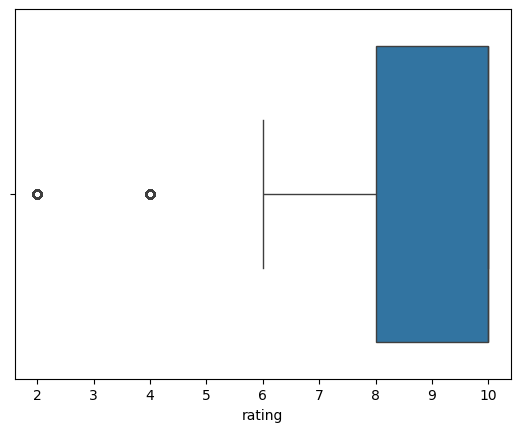

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['rating'])
plt.show()


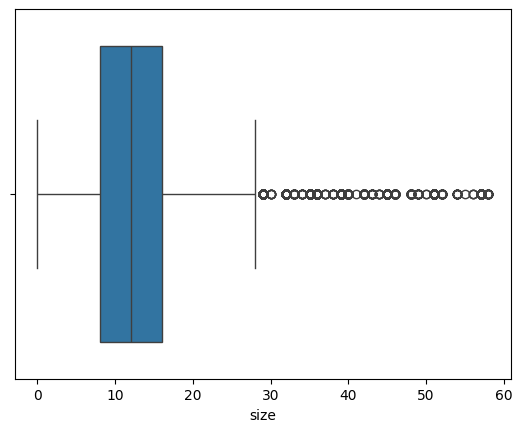

In [56]:

sns.boxplot(x=df['size'])
plt.show()


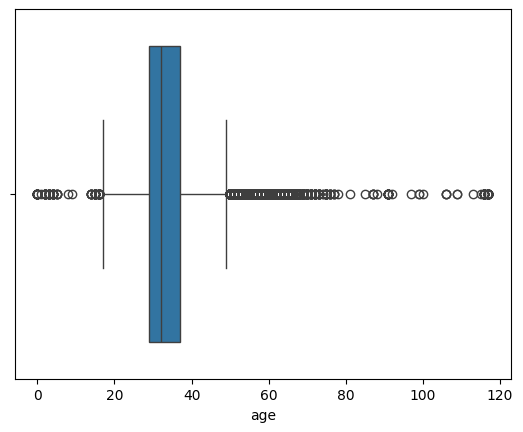

In [57]:

sns.boxplot(x=df['age'])
plt.show()


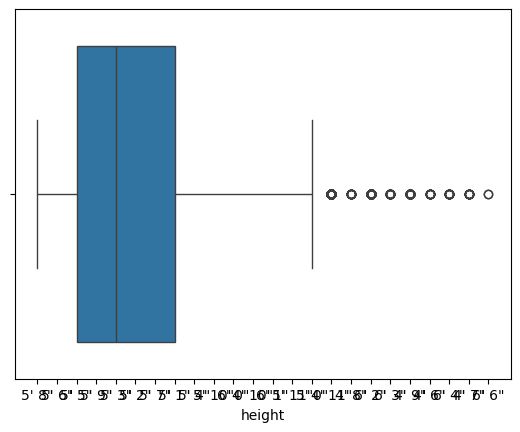

In [58]:

sns.boxplot(x=df['height'])
plt.show()


In [59]:
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and handle outliers
outliers = (df['rating'] < lower_bound) | (df['rating'] > upper_bound)
df = df[~outliers]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 173453 entries, 0 to 192543
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   fit             173453 non-null  category
 1   user_id         173453 non-null  int64   
 2   item_id         173453 non-null  int64   
 3   rating          173453 non-null  float64 
 4   rented for      173453 non-null  category
 5   review_text     173453 non-null  object  
 6   body type       173453 non-null  category
 7   review_summary  173453 non-null  object  
 8   category        173453 non-null  category
 9   height          173453 non-null  object  
 10  size            173453 non-null  int64   
 11  age             173453 non-null  float64 
 12  review_date     173453 non-null  object  
dtypes: category(4), float64(2), int64(3), object(4)
memory usage: 13.9+ MB


In [60]:
from scipy.stats import zscore

z_scores = zscore(df['rating'])
outliers = (z_scores < -3) | (z_scores > 3)
df = df[~outliers]


In [61]:

z_scores = zscore(df['size'])
outliers = (z_scores < -3) | (z_scores > 3)
df = df[~outliers]

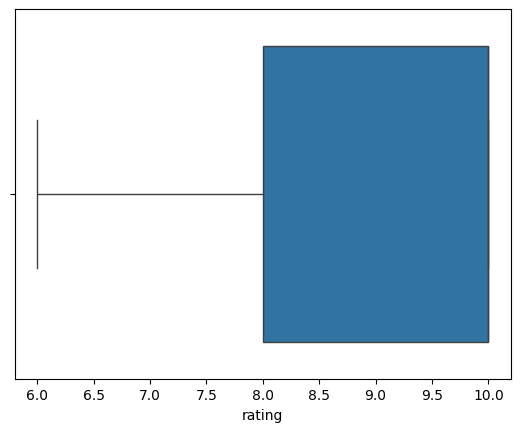

In [62]:
sns.boxplot(x=df['rating'])
plt.show()

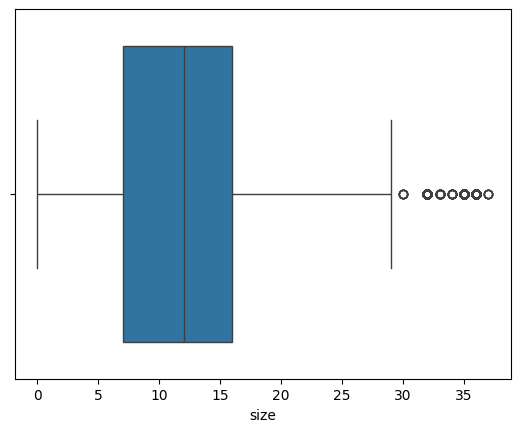

In [63]:
sns.boxplot(x=df['size'])
plt.show()


In [64]:

z_scores = zscore(df['age'])
outliers = (z_scores < -3) | (z_scores > 3)
df = df[~outliers]

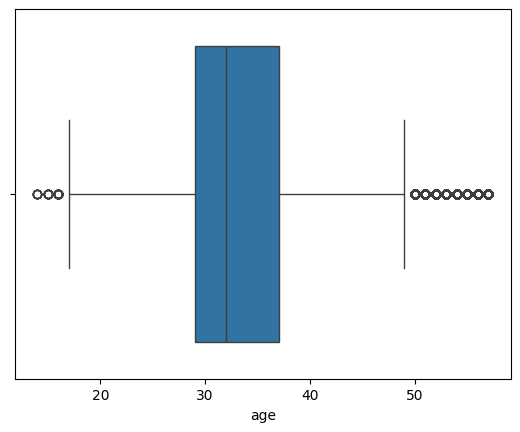

In [65]:

sns.boxplot(x=df['age'])
plt.show()

In [66]:
from sklearn.ensemble import IsolationForest

# Example for 'rating' column
clf = IsolationForest(contamination=0.01)  # Adjust the contamination parameter
outliers = clf.fit_predict(df[['age']]) == -1
df = df[~outliers]


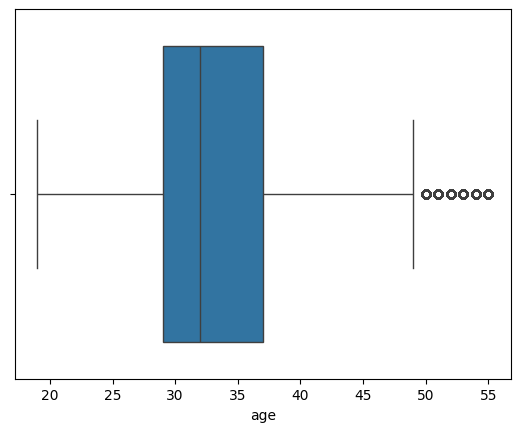

In [67]:

sns.boxplot(x=df['age'])
plt.show()

In [68]:

df = df[(df['age'] >= 0) & (df['age'] <= 100)]


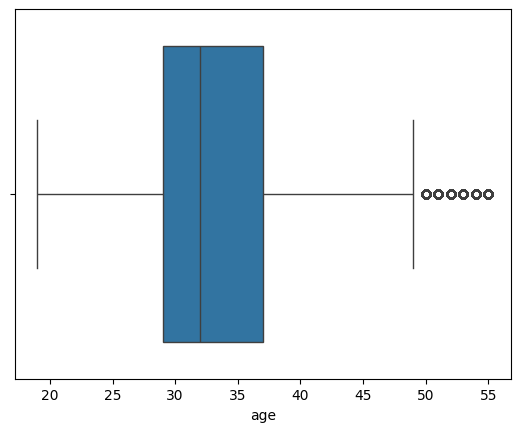

In [69]:
sns.boxplot(x=df['age'])
plt.show()

now change the method 

In [70]:
df

,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,2260466,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,153475,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
3,fit,909926,126335,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,616682,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
5,fit,734848,364092,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,682043,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,683251,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,126335,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


### text cleaning 

In [71]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Function to remove punctuation
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

df['review_text'] = df['review_text'].apply(remove_punctuation)
df['review_summary'] = df['review_summary'].apply(remove_punctuation)

In [72]:
df

,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,2260466,10.0,vacation,An adorable romper Belt and zipper were a litt...,hourglass,So many compliments,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,153475,10.0,other,I rented this dress for a photo shoot The them...,straight & narrow,I felt so glamourous,gown,"5' 6""",12,36.0,"June 18, 2013"
3,fit,909926,126335,8.0,formal affair,I rented this for my companys black tie awards...,pear,Dress arrived on time and in perfect condition,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,616682,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress,gown,"5' 9""",12,27.0,"September 26, 2016"
5,fit,734848,364092,8.0,date,Didnt actually wear it It fit perfectly The fa...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,10.0,work,Fit like a glove,hourglass,LOVE IT First Item Im thinking of buying,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,682043,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,683251,6.0,everyday,Like the other DVF wraps the fit on this is fa...,straight & narrow,Loud patterning flattering fit,dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,126335,10.0,wedding,This dress was PERFECTION it looked incredibl...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [73]:
def convert_to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    return text


df['review_text'] = df['review_text'].apply(convert_to_lowercase)
df['review_summary'] = df['review_summary'].apply(convert_to_lowercase)

In [74]:
df

,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,2260466,10.0,vacation,an adorable romper belt and zipper were a litt...,hourglass,so many compliments,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,153475,10.0,other,i rented this dress for a photo shoot the them...,straight & narrow,i felt so glamourous,gown,"5' 6""",12,36.0,"June 18, 2013"
3,fit,909926,126335,8.0,formal affair,i rented this for my companys black tie awards...,pear,dress arrived on time and in perfect condition,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,616682,10.0,wedding,i have always been petite in my upper body and...,athletic,was in love with this dress,gown,"5' 9""",12,27.0,"September 26, 2016"
5,fit,734848,364092,8.0,date,didnt actually wear it it fit perfectly the fa...,athletic,traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,10.0,work,fit like a glove,hourglass,love it first item im thinking of buying,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,682043,10.0,work,the pattern contrast on this dress is really s...,petite,love it,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,683251,6.0,everyday,like the other dvf wraps the fit on this is fa...,straight & narrow,loud patterning flattering fit,dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,126335,10.0,wedding,this dress was perfection it looked incredibl...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [75]:
def handle_special_characters(text):
    if isinstance(text, str):
        # Remove emoticons
        return re.sub(r'[:;=8][\'`\-]?[)D]!', text)
    return text

In [76]:
df


,fit,user_id,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,2260466,10.0,vacation,an adorable romper belt and zipper were a litt...,hourglass,so many compliments,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,153475,10.0,other,i rented this dress for a photo shoot the them...,straight & narrow,i felt so glamourous,gown,"5' 6""",12,36.0,"June 18, 2013"
3,fit,909926,126335,8.0,formal affair,i rented this for my companys black tie awards...,pear,dress arrived on time and in perfect condition,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,616682,10.0,wedding,i have always been petite in my upper body and...,athletic,was in love with this dress,gown,"5' 9""",12,27.0,"September 26, 2016"
5,fit,734848,364092,8.0,date,didnt actually wear it it fit perfectly the fa...,athletic,traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,10.0,work,fit like a glove,hourglass,love it first item im thinking of buying,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,682043,10.0,work,the pattern contrast on this dress is really s...,petite,love it,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,683251,6.0,everyday,like the other dvf wraps the fit on this is fa...,straight & narrow,loud patterning flattering fit,dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,126335,10.0,wedding,this dress was perfection it looked incredibl...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


### tokenazation 

In [77]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [78]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gameg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gameg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [80]:

# Generalization: Tokenization function
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    return []

# Apply tokenization to the 'review_summary' column
df['tokenized_review_summary'] = df['review_summary'].apply(tokenize_text)

# Apply tokenization to the 'review_text' column
df['tokenized_review_text'] = df['review_text'].apply(tokenize_text)

# Tokenization results
df[['review_summary', 'tokenized_review_summary', 'review_text', 'tokenized_review_text']]


,review_summary,tokenized_review_summary,review_text,tokenized_review_text
0,so many compliments,"[so, many, compliments]",an adorable romper belt and zipper were a litt...,"[an, adorable, romper, belt, and, zipper, were..."
1,i felt so glamourous,"[i, felt, so, glamourous]",i rented this dress for a photo shoot the them...,"[i, rented, this, dress, for, a, photo, shoot,..."
3,dress arrived on time and in perfect condition,"[dress, arrived, on, time, and, in, perfect, c...",i rented this for my companys black tie awards...,"[i, rented, this, for, my, companys, black, ti..."
4,was in love with this dress,"[was, in, love, with, this, dress]",i have always been petite in my upper body and...,"[i, have, always, been, petite, in, my, upper,..."
5,traditional with a touch a sass,"[traditional, with, a, touch, a, sass]",didnt actually wear it it fit perfectly the fa...,"[didnt, actually, wear, it, it, fit, perfectly..."
...,...,...,...,...
192539,love it first item im thinking of buying,"[love, it, first, item, im, thinking, of, buying]",fit like a glove,"[fit, like, a, glove]"
192540,love it,"[love, it]",the pattern contrast on this dress is really s...,"[the, pattern, contrast, on, this, dress, is, ..."
192541,loud patterning flattering fit,"[loud, patterning, flattering, fit]",like the other dvf wraps the fit on this is fa...,"[like, the, other, dvf, wraps, the, fit, on, t..."
192542,loved this dress it was comfortable and photog...,"[loved, this, dress, it, was, comfortable, and...",this dress was perfection it looked incredibl...,"[this, dress, was, perfection, it, looked, inc..."


In [81]:
df.to_csv("final_data.csv")

## change date format for easy undetanding 

In [82]:
df['review_date'] = pd.to_datetime(df['review_date'])


In [83]:
df['review_date'].head(10)

0    2016-04-20
1    2013-06-18
3    2014-02-12
4    2016-09-26
5    2016-04-30
6    2017-12-07
8    2016-06-27
9    2016-10-17
10   2018-01-02
11   2013-01-07
Name: review_date, dtype: datetime64[ns]

In [84]:
df.isnull().sum()

fit                         0
user_id                     0
item_id                     0
rating                      0
rented for                  0
review_text                 0
body type                   0
review_summary              0
category                    0
height                      0
size                        0
age                         0
review_date                 0
tokenized_review_summary    0
tokenized_review_text       0
dtype: int64